In [1]:
import os, sys

import sgpp
import dproc
import sgutil
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

print(sys.version)

from sklearn.pipeline import make_pipeline

3.12.6 (main, Sep 30 2024, 02:19:13) [GCC 9.4.0]


In [3]:
p = make_pipeline(
    sgpp.PolarsProcessor(),
    sgpp.PandasConverter(index_col = 'id')
)
p.fit(['data/train.csv'])
df_train = p.transform(['data/train.csv'])
df_test = p.transform(['data/test.csv'])

In [7]:
X_num = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']
X_cat = ['Episode_Sentiment', 'Episode_Title', 'Genre', 'Podcast_Name', 'Publication_Day', 'Publication_Time']
sc = sgutil.SGCache('img', 'result', 'model')
target = 'Listening_Time_minutes'

In [38]:
df = pd.concat([df_train, df_test]).pipe(
    lambda x: x.loc[x['Episode_Length_minutes'].notna()]
)

In [12]:
df.groupby(['Podcast_Name'])['Episode_Length_minutes'].apply(
    lambda x: pd.Series([(x == x.mode()[0]).mean(), len(x)], index = ['mode_mean', 'cnt'])
).unstack().sort_values('mode_mean', ascending = False).head()

,mode_mean,cnt
Podcast_Name,,
Finance Focus,0.025674,23487.0
Sports Central,0.009114,21615.0
Digital Digest,0.004296,21417.0
World Watch,0.003764,18599.0
Business Insights,0.003625,25928.0


- Episode_Length_minutes 를 범주형 변수로 처리하여 접근하는 방법

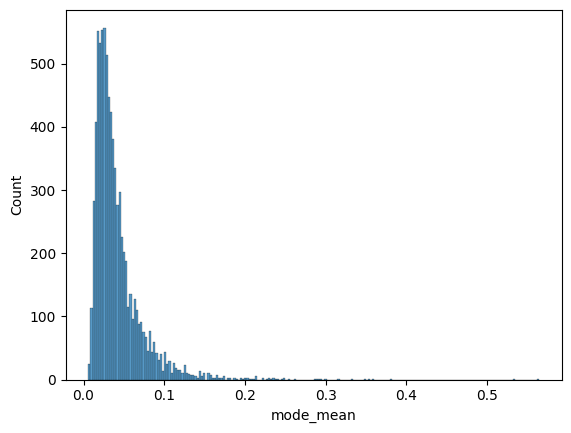

In [20]:
sns.histplot(
    df.groupby(['Host_Popularity_percentage'])['Episode_Length_minutes'].apply(
        lambda x: pd.Series([(x == x.mode()[0]).mean(), len(x)], index = ['mode_mean', 'cnt'])
    ).unstack().sort_values('cnt', ascending = False).query(
        'cnt >= 10'
    )['mode_mean']
)
plt.show()

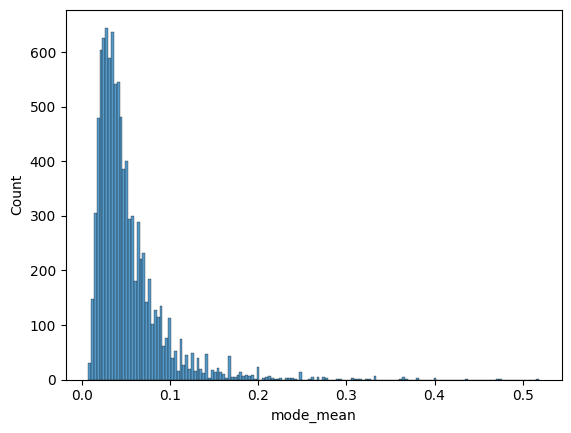

In [21]:
sns.histplot(
    df.groupby(['Guest_Popularity_percentage'])['Episode_Length_minutes'].apply(
        lambda x: pd.Series([(x == x.mode()[0]).mean(), len(x)], index = ['mode_mean', 'cnt'])
    ).unstack().sort_values('cnt', ascending = False).query(
        'cnt >= 10'
    )['mode_mean']
)
plt.show()

In [22]:
df.groupby(['Number_of_Ads'])['Episode_Length_minutes'].apply(
    lambda x: pd.Series([(x == x.mode()[0]).mean(), len(x)], index = ['mode_mean', 'cnt'])
).unstack().sort_values('cnt', ascending = False).query(
    'cnt >= 10'
)

,mode_mean,cnt
Number_of_Ads,,
0.0,0.001483,255596.0
1.0,0.000984,252985.0
3.0,0.002057,189598.0
2.0,0.001161,185980.0


In [24]:
df.groupby(['Episode_Sentiment'])['Episode_Length_minutes'].apply(
    lambda x: pd.Series([(x == x.mode()[0]).mean(), len(x)], index = ['mode_mean', 'cnt'])
).unstack().sort_values('cnt', ascending = False).query(
    'cnt >= 10'
)['mode_mean']

Episode_Sentiment
Neutral     0.000742
Negative    0.003416
Positive    0.000874
Name: mode_mean, dtype: float64

<Axes: xlabel='mode_mean', ylabel='Count'>

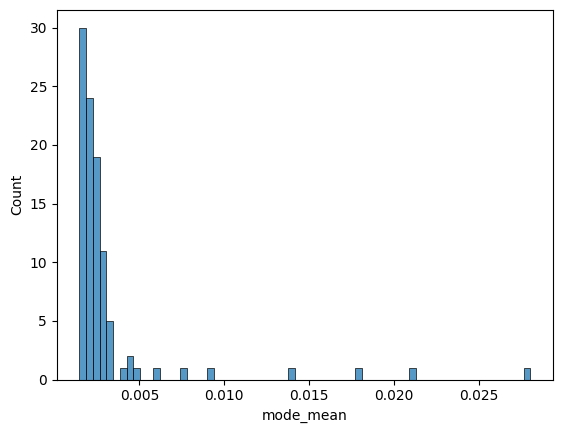

In [26]:
sns.histplot(
    df.groupby(['Episode_Title'])['Episode_Length_minutes'].apply(
        lambda x: pd.Series([(x == x.mode()[0]).mean(), len(x)], index = ['mode_mean', 'cnt'])
    ).unstack().sort_values('cnt', ascending = False).query(
        'cnt >= 10'
    )['mode_mean']
)

<Axes: xlabel='mode_mean', ylabel='Count'>

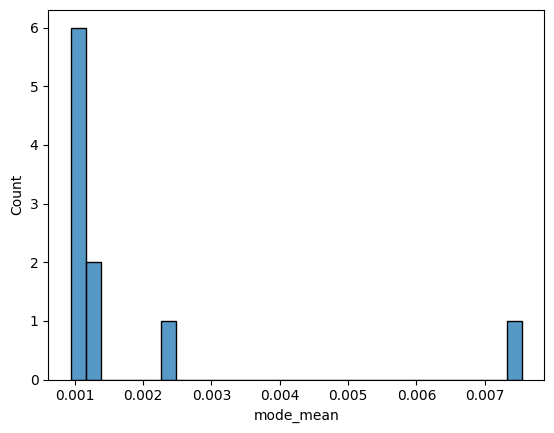

In [27]:
sns.histplot(
    df.groupby(['Genre'])['Episode_Length_minutes'].apply(
        lambda x: pd.Series([(x == x.mode()[0]).mean(), len(x)], index = ['mode_mean', 'cnt'])
    ).unstack().sort_values('cnt', ascending = False).query(
        'cnt >= 10'
    )['mode_mean']
)

<Axes: xlabel='mode_mean', ylabel='Count'>

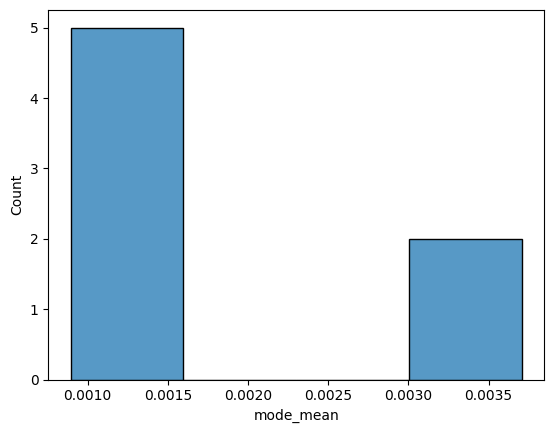

In [29]:
sns.histplot(
    df.groupby(['Publication_Day'])['Episode_Length_minutes'].apply(
        lambda x: pd.Series([(x == x.mode()[0]).mean(), len(x)], index = ['mode_mean', 'cnt'])
    ).unstack().sort_values('cnt', ascending = False).query(
        'cnt >= 10'
    )['mode_mean']
)

<Axes: xlabel='mode_mean', ylabel='Count'>

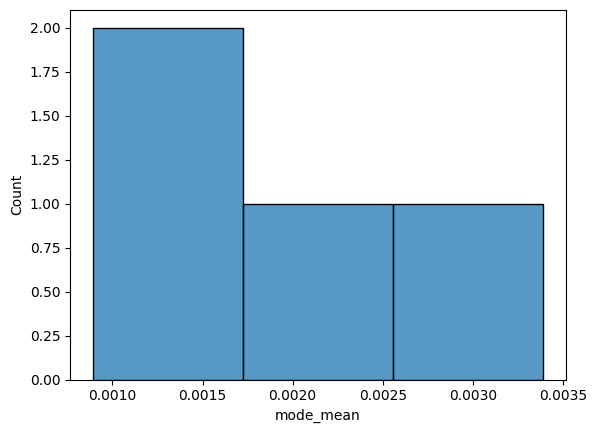

In [30]:
sns.histplot(
    df.groupby(['Publication_Time'])['Episode_Length_minutes'].apply(
        lambda x: pd.Series([(x == x.mode()[0]).mean(), len(x)], index = ['mode_mean', 'cnt'])
    ).unstack().sort_values('cnt', ascending = False).query(
        'cnt >= 10'
    )['mode_mean']
)

In [35]:
df.groupby(['Host_Popularity_percentage'])['Episode_Length_minutes'].apply(
    lambda x: pd.Series([(x == x.mode()[0]).mean(), len(x), x.mode()[0]], index = ['mode_mean', 'cnt', 'mode'])
).unstack().query(
    'cnt >= 10'
).sort_values('mode_mean', ascending = False).iloc[:15]

,mode_mean,cnt,mode
Host_Popularity_percentage,,,
67.279999,0.564315,241.0,6.600000
43.500000,0.533333,15.0,29.520000
44.009998,0.381579,152.0,6.600000
80.190002,0.358209,67.0,5.630000
94.699997,0.352941,17.0,91.699997
67.580002,0.349398,83.0,6.600000
36.450001,0.333333,12.0,9.101547
22.299999,0.315789,19.0,95.419998
99.470001,0.300000,30.0,48.560001


In [37]:
df.groupby(['Guest_Popularity_percentage'])['Episode_Length_minutes'].apply(
    lambda x: pd.Series([(x == x.mode()[0]).mean(), len(x), x.mode()[0]], index = ['mode_mean', 'cnt', 'mode'])
).unstack().query(
    'cnt >= 10'
).sort_values('mode_mean', ascending = False).iloc[:15]

,mode_mean,cnt,mode
Guest_Popularity_percentage,,,
32.480000,0.518519,27.0,117.059998
35.430000,0.473684,19.0,32.279999
35.779999,0.470588,17.0,75.980003
3.800000,0.437500,32.0,16.260000
53.180000,0.400000,35.0,58.270000
1.450000,0.400000,15.0,119.029999
94.300003,0.380952,21.0,69.449997
91.959999,0.380952,21.0,9.850000
59.450001,0.368421,19.0,112.769997


In [69]:
from sklearn.preprocessing import TargetEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, KFold
df_train_1 = df_train.loc[df_train['Episode_Length_minutes'].notna()]
df_train_2 = df_train.loc[df_train['Episode_Length_minutes'].isna()]
reg_lr = make_pipeline(
    ColumnTransformer([
        ('tgt', TargetEncoder(), ['Episode_Length_minutes']),
        ('mm', FunctionTransformer(lambda x: (np.clip(x, a_min = 5, a_max = 120) - 5) / 115), ['Episode_Length_minutes'])
    ]), LinearRegression()
)
cross_val_score(
    reg_lr, df_train_1[['Episode_Length_minutes']], df_train_1[target], 
    cv = KFold(5, random_state = 123, shuffle = True), scoring = 'neg_root_mean_squared_error'
)

array([-10.70049524, -10.71192501, -10.70662338, -10.72108133,
       -10.71688242])

In [70]:
reg_lr.fit(df_train_1[['Episode_Length_minutes']], df_train_1[target])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('tgt', TargetEncoder(),
                                                  ['Episode_Length_minutes']),
                                                 ('mm',
                                                  FunctionTransformer(func=<function <lambda> at 0x7fa5fa58a0c0>),
                                                  ['Episode_Length_minutes'])])),
                ('linearregression', LinearRegression())])

In [72]:
df_gpp = df.groupby(['Guest_Popularity_percentage'])['Episode_Length_minutes'].apply(
    lambda x: pd.Series([(x == x.mode()[0]).mean(), len(x), x.mode()[0]], index = ['mode_mean', 'cnt', 'mode'])
).unstack()

In [110]:
df_hpp = df.groupby('Host_Popularity_percentage')['Episode_Length_minutes'].apply(
    lambda x: pd.Series([x.mode()[0], len(x), (x == x.mode()[0]).mean()], index = ['mode', 'cnt', 'mode_mean'])
).unstack()

In [74]:
df_gpp_s = df_gpp.loc[(df_gpp['mode_mean'] >= 0.1) & (df_gpp['cnt'] >= 10)]
df_hpp_s = df_gpp.loc[(df_hpp['mode_mean'] >= 0.1) & (df_hpp['cnt'] >= 10)]

,mode_mean,cnt,mode
Guest_Popularity_percentage,,,
0.000000,0.166667,6.0,8.140000
0.010000,0.039216,51.0,57.840000
0.020000,0.315789,19.0,103.660004
0.030000,0.035714,28.0,8.320000
0.040000,0.027523,109.0,90.660004
...,...,...,...
115.430000,1.000000,1.0,55.020000
115.620003,1.000000,2.0,55.020000
115.849998,1.000000,1.0,55.820000


In [171]:
df_hpp_s = df_hpp.loc[(df_hpp['mode_mean'] >= 0.3) & (df_hpp['cnt'] >= 100)]
df_hpp_s

,mode,cnt,mode_mean
Host_Popularity_percentage,,,
44.009998,6.6,152.0,0.381579
67.279999,6.6,241.0,0.564315


In [172]:
from sklearn.metrics import root_mean_squared_error
df_train_2.assign(
    Episode_Length_minutes = df_train_2['Host_Popularity_percentage'].map(df_hpp_s['mode'])
).pipe(
    lambda x: x.loc[x['Episode_Length_minutes'].notna()]
).pipe(
    lambda x: (root_mean_squared_error(x[target], reg_lr.predict(x[['Episode_Length_minutes']])), ((x[target] - df_train[target].mean()) ** 2).mean() ** 0.5)
)

(np.float64(46.554889959046555), np.float32(25.94322))

In [173]:
df_gpp_s = df_gpp.loc[(df_gpp['mode_mean'] >= 0.3) & (df_gpp['cnt'] >= 50)]
df_gpp_s

,mode_mean,cnt,mode
Guest_Popularity_percentage,,,
31.219999,0.333333,99.0,5.830000
98.190002,0.321429,56.0,38.360001


In [174]:
from sklearn.metrics import root_mean_squared_error
df_train_2.assign(
    Episode_Length_minutes = df_train_2['Guest_Popularity_percentage'].map(df_gpp_s['mode'])
).pipe(
    lambda x: x.loc[x['Episode_Length_minutes'].notna()]
).pipe(
    lambda x: (root_mean_squared_error(x[target], reg_lr.predict(x[['Episode_Length_minutes']])), ((x[target] - df_train[target].mean()) ** 2).mean() ** 0.5)
)

(np.float64(40.38482810808974), np.float32(21.845308))

- 연속형 변수로의 대치는 추후로 미룹니다.

- Episode_Length_minutes 는 범주형 변수화

- Episode_Length_minutes를 5에서 120 사이로 